## Softmax regression
3개 이상의 클래스에 대해 분류하는 경우를 가정

n개의 값을 갖는 임의의 벡터를 합계가 1인 확률값 분포로 바꾸어 줌

오차를 구하기 위해 소프트맥스 결과값과 같은 차원의 레이블 정보를 생성함

해당 클래스는 확률 1, 나머지는 확률 0으로 만드는 벡터 생성 방식을 원-핫 인코딩이라고 함

shape이 같은 예측값 및 레이블 텐서로부터 손실 값을 구하고 경사하강법을 통해 학습을 진행함 (오차로부터 가중치와 편향 업데이트)

오차를 구하기 위한 손실 함수로는 Cross entropy(CE) 함수를 활용
> 1. 각 클래스에 대한 오차를 모두 더해서 최종 오차를 계산하며
2. 실제 값에 해당하는 클래스 말고는 모두 y 값이 0이 되므로 값이 0으로 바뀌고
3. 오차가 매겨지는 실제 클래스에서는 해당 클래스임을 예측하는 확률에 대한 로그 함수 값에 -1을 곱한 것이 오차값이 됨
4. -1을 곱해놓았기 떄문에 해당 클래스일 확률을 1에 가깝게 예측할수록 손실값이 0에 가까워지고 0에 가깝게 예측할수록 손실값이 무한대에 가까워지게 됨

In [2]:
import torch as t
import torch.nn as nn
import torch.nn.functional as F

In [3]:
"""
소프트맥스 회귀 모델은 예측값 생성 시 softmax 연산을 수행한 확률값을 출력하여야 하지만
pytorch에서는 손실값 계산 시 자동으로 softmax연산까지 수행하므로 일반적으로 모델 코드에서 
softmax를 생략하고 사용함
따라서 예측값 생성 및 출력시에는 별도의 softmax 연산 필요
"""
class SoftmaxRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(4,3)
    #pytorch의 CE class는 손실값 계산 시 softmax 연산까지 포함되어 있음

  def forward(self, x):
    return self.linear(x)

In [5]:
#pytorch에서 softmax 기반 분류를 수행할 때는 레이블 정보를 long type의 1d텐서로 입력해야함
#손실 값 계산 시 one-hot vector 생성은 내부적으로 자동으로 수행됨

x_train=t.FloatTensor([[6.3, 3.3, 6.0, 2.5],
                       [5.8, 2.7, 5.1, 1.9],
                       [7.1, 3.0, 5.9, 2.1],
                       [5.1, 3.5, 1.4, 0.2],
                       [4.9, 3.0, 1.4, 0.2],
                       [4.7, 3.2, 1.3, 0.2],
                       [7.0, 3.2, 4.7, 1.4],
                       [6.4, 3.2, 4.5, 1.4],
                       [6.9, 3.1, 4.9, 1.5]])
y_train=t.LongTensor([0,0,0,1,1,1,2,2,2])

model=SoftmaxRegression()

optimizer=t.optim.SGD(model.parameters(), lr=1e-1)
nb_epochs=1000
for epoch in range(nd_epochs+1):
  prediction=model(x_train)
  cost=F.cross_entropy(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    correct_prediction=t.argmax(prediction, 1)==y_train 
    #argmax를 dim 1에 수행하면 각각 데이터에 대해 예측값에서 가장 큰 값의 index(class numer)가 반환됨
    accuracy=correct_prediction.float().mean().item()
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy: {:2.2f}%'.format(epoch, nb_epochs, cost.item(), accuracy*100))

Epoch    0/1000 Cost: 1.634637 Accuracy: 33.33%
Epoch  100/1000 Cost: 0.255669 Accuracy: 100.00%
Epoch  200/1000 Cost: 0.149091 Accuracy: 100.00%
Epoch  300/1000 Cost: 0.109752 Accuracy: 100.00%
Epoch  400/1000 Cost: 0.086835 Accuracy: 100.00%
Epoch  500/1000 Cost: 0.071826 Accuracy: 100.00%
Epoch  600/1000 Cost: 0.061237 Accuracy: 100.00%
Epoch  700/1000 Cost: 0.053367 Accuracy: 100.00%
Epoch  800/1000 Cost: 0.047291 Accuracy: 100.00%
Epoch  900/1000 Cost: 0.042458 Accuracy: 100.00%
Epoch 1000/1000 Cost: 0.038522 Accuracy: 100.00%


In [6]:
test_data=t.FloatTensor([[6.3,2.9,5.6,1.8],
                         [6.5,3.0,5.8,2.2],
                         [4.6,3.1,1.5,0.2],
                         [5.0,3.6,1.4,0.2],
                         [5.5,2.3,4.0,1.3],
                         [6.5,2.8,4.6,1.5]])
prediction=F.softmax(model(test_data), dim=1)
print(prediction)

tensor([[9.4256e-01, 2.8632e-05, 5.7409e-02],
        [9.8389e-01, 5.9338e-06, 1.6103e-02],
        [1.7716e-07, 9.7640e-01, 2.3602e-02],
        [5.4535e-09, 9.9369e-01, 6.3131e-03],
        [2.3283e-01, 6.8435e-03, 7.6033e-01],
        [1.1405e-01, 4.4426e-03, 8.8151e-01]], grad_fn=<SoftmaxBackward0>)


배치 경사하강법 방식은 데이터셋 전체에 대해 한번에 '예측값 계산>손실값 계산>미분값 계산>업데이트'수행

배치란 전체 데이터 묶음 ~

미니배치 경사하강법: 데이터셋이 너무 커지면 한 번에 메모리에 올려서 계산하기 힘들기 떄문에 데이터셋을 여러 조각으로 나누어 경사하강법을 수행하는 것

미니배치란 gradient descent를 수행하는 단위인 작은데이터 묶음

미니배치 크기를 배치 크기

epoch: 데이터셋 전체에 대해 모두 경사하강법을 수행하는 단위

iteration: 경사하강법 수행하는 횟수 하나하나

배치 경사하강법에서는 1이터레이션=1에포크

미니배치 경사하강법에서는 특정횟수의 이터레이션이 쌓여야 1 에포크가 됨

In [7]:
"""
pytorch에서는 미니 배치 경사하강법 수행을 위해 dataloader라는 클래스를 제공힘
미니배치를 하나씩 반환해주는 iterator

dataloader 활용을 위해서는 데이터셋 객체부터 생성하여야 하며 데이터셋은 다양한 방식으로 생성가능
"""

import torch as t
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset #텐서데이터셋
from torch.utils.data import DataLoader

In [8]:
x_train=t.FloatTensor([[73,80,75],
                       [93,88,93],
                       [89,91,90],
                       [96,98,100],
                       [73,66,70]])
y_train=t.FloatTensor([[152],[185],[180],[196],[142]])

In [10]:
"""
데이터로더 생성시 데이터셋은 필수로 입력해주어야 함
그 외 매개변수는 지정하여 입력가능
batch_size는 상황에 맞게
shuffle 옵션은 epoch마다 데이터셋 내 데이터 순서 섞을건가 ?
>training data에서만 사용함
"""
dataset=TensorDataset(x_train, y_train)
dataloader=DataLoader(dataset, batch_size=2, shuffle=True)

"""
epoch for문 안에 미니배치 for문도 생김
현재 데이터셋은 데이터, 레이블 두 종류의 텐서를 합쳐서 만들어졌으므로 데이터로더에서도
(데이터, 레이블) 형태의 튜플로 값을 넘겨주게 됨
만약 네종류면 네 종류 텐서 포함된 튜플을 넘겨주겟지
"""

nb_epoch=20
for epoch in range(nb_epochs+1):
  for batch_idx, samples in enumerate(dataloader): #enumerata말고 range로 값만 받을수도 있음
    x_train, y_train=samples

## MNIST Data set
0~9 손글씨 데이터셋, 28x28 흑백 이미지, 60000개 학습 데이터, 10000개의 테스트 데이터

소프트맥스 회귀는 1차원을 다루고 MNIST는 3차원(가로세로채널)이므로 shape 변경 필요



In [15]:
class MNIST_SoftmaxRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(784,10)

  def forward(self, x):
    return self.linear(x)

In [12]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random

In [18]:
#hyperparameters: 총 에포크 배치크기 등 학습에 영향주며 사람이 값 지정하는 변수
training_epochs=15
batch_size=100

#MNIST dataset
mnist_train=dsets.MNIST(root='MNIST_data/',
                        train=True,
                        transform=transforms.ToTensor(), #데이터를 tensor로 바꾸는거
                        download=True)
mnist_test=dsets.MNIST(root='MNIST_data/',
                       train=False,
                       transform=transforms.ToTensor(),
                       download=True)


In [19]:
#dataset loader
data_loader=DataLoader(dataset=mnist_train,
                       batch_size=batch_size,
                       shuffle=True)

model=MNIST_SoftmaxRegression()
criterion=nn.CrossEntropyLoss() #매번 손실값 계산안하고 이걸로 손실값 계산 객체 만들어 둠
optimizer=t.optim.SGD(model.parameters(), lr=0.1)

In [22]:
#MNIST 데이터셋은 데이터, 레이블 두 종류의 텐서가 합쳐져있는 형태
#따라서 데이터로드에서 (데이터,레이블) 형태의 튜플로 값을 넘겨줌
for epoch in range(training_epochs):
  avg_cost=0
  total_batch=len(data_loader)

  for idx, (x_train, y_train) in enumerate(data_loader):
    #배치 크기가 100이므로 아래의 연산에서 x_train은 (100, 784)의 텐서가 된다
    #######################왜 ?
    x_train=x_train.view(-1, 28*28)
    #레이블은 one-hot encoding이 된 상태가 아니라 0~9 정수

    pred=model(x_train)
    cost=criterion(pred, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    avg_cost+=cost/total_batch
  
  print('Epoch:', '%04d'%(epoch+1), 'Cost= ', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 Cost=  0.534441590
Epoch: 0002 Cost=  0.359450966
Epoch: 0003 Cost=  0.331326246
Epoch: 0004 Cost=  0.316616446
Epoch: 0005 Cost=  0.306899518
Epoch: 0006 Cost=  0.300265729
Epoch: 0007 Cost=  0.294818312
Epoch: 0008 Cost=  0.290763915
Epoch: 0009 Cost=  0.287647098
Epoch: 0010 Cost=  0.284500241
Epoch: 0011 Cost=  0.281978816
Epoch: 0012 Cost=  0.279912949
Epoch: 0013 Cost=  0.277712166
Epoch: 0014 Cost=  0.276157498
Epoch: 0015 Cost=  0.274470389
Learning finished


In [23]:
with t.no_grad(): #gradient 계산 안함
   x_test=mnist_test.data.view(-1,28*28).float()
   y_test=mnist_test.targets

   prediction=model(x_test)
   correct_prediction=t.argmax(prediction, 1)==y_test
   accuracy=correct_prediction.float().mean()
   print('Accuracy: ', accuracy.item())

Accuracy:  0.8799999952316284


Label:  4
Prediction:  4


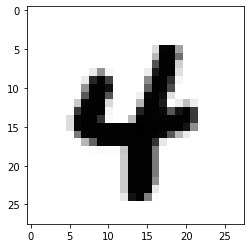

In [27]:
with t.no_grad():
  r=random.randint(0, len(mnist_test)-1)
  x_single_data=mnist_test.data[r:r+1].view(-1,28*28).float()
  y_single_data=mnist_test.targets[r:r+1]

  print('Label: ', y_single_data.item())
  single_prediction=model(x_single_data)
  print('Prediction: ', t.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
  plt.show()

## 실습 해보기이

In [36]:
#linear regression part1
#데이터셋 생성
x_train=t.FloatTensor([6,7,6.5,8,6.6,8.1,6.8,6.9,7.3,6.9]).view(-1,1)
y_train=t.FloatTensor([53,60,56,79,58,85,70,56,69,76]).view(-1,1)

#모델 초기화
W=t.zeros(1, requires_grad=True)
b=t.zeros(1, requires_grad=True)
#optimizer 설정
optimizer=t.optim.SGD([W,b], lr=0.01)

nb_epochs=1000
for epoch in range(nb_epochs+1):
  #가설, 손실함수
  hypo=x_train*W+b
  cost=t.mean((hypo-y_train)**2)

  #경사하강법
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))


Epoch    0/1000 W: 9.392, b: 1.324 Cost: 4494.799805
Epoch  100/1000 W: 9.376, b: 0.751 Cost: 42.099495
Epoch  200/1000 W: 9.454, b: 0.201 Cost: 41.789967
Epoch  300/1000 W: 9.531, b: -0.342 Cost: 41.489521
Epoch  400/1000 W: 9.607, b: -0.877 Cost: 41.197891
Epoch  500/1000 W: 9.681, b: -1.403 Cost: 40.914864
Epoch  600/1000 W: 9.755, b: -1.922 Cost: 40.640152
Epoch  700/1000 W: 9.827, b: -2.433 Cost: 40.373528
Epoch  800/1000 W: 9.898, b: -2.937 Cost: 40.114727
Epoch  900/1000 W: 9.969, b: -3.433 Cost: 39.863544
Epoch 1000/1000 W: 10.038, b: -3.922 Cost: 39.619759


In [37]:
x_test=t.FloatTensor([[8.2]])
prediction=x_test.matmul(W)+b
print(prediction)

tensor([78.3875], grad_fn=<AddBackward0>)


In [51]:
#linear regression part2
#multiple linear regression

a=t.FloatTensor([41.9,29.1,251.3,43.4,29.3,251.3,43.9,29.5,248.3,44.5,29.7,267.5,47.3,29.9,273.0,47.5,30.3,276.5,47.9,30.5,270.3,50.2,30.7,274.9,52.8,30.8,285.0,53.2,30.9,290.0]).view(10,3)
x_train=a[:,:2]
y_train=a[:,2]

W=t.zeros((2,1), requires_grad=True)
b=t.zeros(1, requires_grad=True)

optimizer=t.optim.SGD([W,b], lr=1e-5)
nb_epochs=1000

for epoch in range(nb_epochs+1):
  hypo=x_train.matmul(W)+b
  cost=t.mean((hypo-y_train)**2)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  w_list=W.view(-1).tolist()
  
  if epoch%100==0:
    print('Epoch {:4d}/{} w1: {:.3f}, w2: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(epoch, nb_epochs, w_list[0], w_list[1], b.item(), cost.item()))

Epoch    0/1000 w1: 0.254, w2: 0.162, b: 0.005 Cost: 72445.085938
Epoch  100/1000 w1: 4.004, w2: 2.597, b: 0.087 Cost: 457.821259
Epoch  200/1000 w1: 3.984, w2: 2.642, b: 0.089 Cost: 455.295471
Epoch  300/1000 w1: 3.958, w2: 2.682, b: 0.091 Cost: 452.950928
Epoch  400/1000 w1: 3.932, w2: 2.723, b: 0.093 Cost: 450.627197
Epoch  500/1000 w1: 3.906, w2: 2.764, b: 0.095 Cost: 448.323822
Epoch  600/1000 w1: 3.881, w2: 2.804, b: 0.097 Cost: 446.040619
Epoch  700/1000 w1: 3.855, w2: 2.844, b: 0.099 Cost: 443.777802
Epoch  800/1000 w1: 3.830, w2: 2.884, b: 0.101 Cost: 441.535248
Epoch  900/1000 w1: 3.805, w2: 2.924, b: 0.103 Cost: 439.312225
Epoch 1000/1000 w1: 3.780, w2: 2.963, b: 0.105 Cost: 437.109070


In [52]:
x_test=t.FloatTensor([[57,31.7]])
prediction=x_test.matmul(W)+b
print(prediction)

tensor([[309.4786]], grad_fn=<AddBackward0>)


In [55]:
#logistic regression
class LogisticRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(2,1)
    self.sigmoid=nn.Sigmoid()
  def forward(self,x):
    return self.sigmoid(self.linear(x))
x_train=t.FloatTensor([[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]])
y_train=t.FloatTensor([[0],[0],[0],[1],[1],[1]])

model=LogisticRegression()

optimizer=t.optim.SGD(model.parameters(), lr=1e-1)
nb_epochs=1000
for epoch in range(nb_epochs+1):
  prediction=model(x_train)
  cost=F.binary_cross_entropy(prediction, y_train) #CE loss

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    prediction_class=prediction>=t.FloatTensor([0.5])
    correct_prediction=prediction_class.float()==y_train
    accuracy=correct_prediction.sum().item()/len(correct_prediction)
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy: {:2.2f}%'.format(
          epoch, nb_epochs, cost.item(), accuracy*100
      ))

Epoch    0/1000 Cost: 1.833724 Accuracy: 50.00%
Epoch  100/1000 Cost: 0.460117 Accuracy: 83.33%
Epoch  200/1000 Cost: 0.385929 Accuracy: 83.33%
Epoch  300/1000 Cost: 0.329730 Accuracy: 83.33%
Epoch  400/1000 Cost: 0.285886 Accuracy: 83.33%
Epoch  500/1000 Cost: 0.251329 Accuracy: 100.00%
Epoch  600/1000 Cost: 0.223719 Accuracy: 100.00%
Epoch  700/1000 Cost: 0.201325 Accuracy: 100.00%
Epoch  800/1000 Cost: 0.182888 Accuracy: 100.00%
Epoch  900/1000 Cost: 0.167494 Accuracy: 100.00%
Epoch 1000/1000 Cost: 0.154475 Accuracy: 100.00%


In [56]:
test_data=t.FloatTensor([[5,5],[1,4]]) #class 1, class 0 하나씩 추론 시도
prediction=model(test_data)
print(prediction)


tensor([[0.9635],
        [0.0571]], grad_fn=<SigmoidBackward0>)


In [60]:
#softmax regression
class SoftmaxRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(4,3)
  def forward(self, x):
    return self.linear(x)

x_train = t.FloatTensor([[6.3, 3.3, 6.0, 2.5], 
                             [5.8, 2.7, 5.1, 1.9], 
                             [7.1, 3.0, 5.9, 2.1], 
                             [5.1, 3.5, 1.4, 0.2], 
                             [4.9, 3.0, 1.4, 0.2], 
                             [4.7, 3.2, 1.3, 0.2],
                             [7.0, 3.2, 4.7, 1.4],
                             [6.4, 3.2, 4.5, 1.5],
                             [6.9, 3.1, 4.9, 1.5]])  
y_train=t.LongTensor([0,0,0,1,1,1,2,2,2]) #얘는 long으로 받아야하는데 왜?

model=SoftmaxRegression()

optimizer=t.optim.SGD(model.parameters(), lr=1e-1)
nb_epochs=1000
for epoch in range(nb_epochs+1):
  prediction=model(x_train)
  cost=F.cross_entropy(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  
  if epoch%100==0:
    correct_prediction=t.argmax(prediction, 1) ==y_train
    accuracy=correct_prediction.float().mean().item()
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy: {:2.2f}%'.format(
          epoch, nb_epochs, cost.item(), accuracy*100
      ))


Epoch    0/1000 Cost: 1.963421 Accuracy: 33.33%
Epoch  100/1000 Cost: 0.278576 Accuracy: 88.89%
Epoch  200/1000 Cost: 0.160045 Accuracy: 100.00%
Epoch  300/1000 Cost: 0.118163 Accuracy: 100.00%
Epoch  400/1000 Cost: 0.093453 Accuracy: 100.00%
Epoch  500/1000 Cost: 0.077183 Accuracy: 100.00%
Epoch  600/1000 Cost: 0.065681 Accuracy: 100.00%
Epoch  700/1000 Cost: 0.057131 Accuracy: 100.00%
Epoch  800/1000 Cost: 0.050531 Accuracy: 100.00%
Epoch  900/1000 Cost: 0.045287 Accuracy: 100.00%
Epoch 1000/1000 Cost: 0.041023 Accuracy: 100.00%


In [61]:
#soft regression for mnist datasets
class MNIST_SoftmaxRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(784,10)

  def forward(self, x):
    return self.linear(x)

In [75]:
#하이퍼파라미터 설정
training_epoch=15
batch_size=100

#데이터셋 만들고
mnist_train=dsets.MNIST(root='MNIST_data/',
                        train=True,
                        transform=transforms.ToTensor(),
                        download=True)
mnist_test=dsets.MNIST(root='MNIST_data/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

#데이터로드 만들고
data_loader=DataLoader(dataset=mnist_train,
                       batch_size=batch_size,
                       shuffle=True)


model=MNIST_SoftmaxRegression()
criterion=nn.CrossEntropyLoss() #얘가 CE loss 계산할 객체
optimizer=t.optim.SGD(model.parameters(), lr=0.1)

print("W: ", list(model.parameters())[0].shape, "b: ", list(model.parameters())[1].shape)
for epoch in range(training_epoch):
  avg_cost=0
  total_batch=len(data_loader)

  for idx, (x_train, y_train) in enumerate(data_loader):
    print('Original: ', x_train.shape) #(100,1,28,28) (배치사이즈, 채널, 높이, 폭)
    x_train=x_train.view(-1,28*28)
    print('Reshaped: ', x_train.shape) #(100,784) (배치사이즈, 데이터사이즈) 회귀할라고 바꾼거
    pred=model(x_train)
    print('Result: ', pred.shape) #(100,10) (배치사이즈, 클래스사이즈)
    cost=criterion(pred, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    avg_cost+=cost/total_batch #이게 뭐하는건지 모르겠어

  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning finished')



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Result:  torch.Size([100, 10])
Original:  torch.Size([100, 1, 28, 28])
Reshaped:  torch.Size([100, 784])
Result:  torch.Size([100, 10])
Original:  torch.Size([100, 1, 28, 28])
Reshaped:  torch.Size([100, 784])
Result:  torch.Size([100, 10])
Original:  torch.Size([100, 1, 28, 28])
Reshaped:  torch.Size([100, 784])
Result:  torch.Size([100, 10])
Original:  torch.Size([100, 1, 28, 28])
Reshaped:  torch.Size([100, 784])
Result:  torch.Size([100, 10])
Original:  torch.Size([100, 1, 28, 28])
Reshaped:  torch.Size([100, 784])
Result:  torch.Size([100, 10])
Original:  torch.Size([100, 1, 28, 28])
Reshaped:  torch.Size([100, 784])
Result:  torch.Size([100, 10])
Original:  torch.Size([100, 1, 28, 28])
Reshaped:  torch.Size([100, 784])
Result:  torch.Size([100, 10])
Original:  torch.Size([100, 1, 28, 28])
Reshaped:  torch.Size([100, 784])
Result:  torch.Size([100, 10])
Original:  torch.Size([100, 1, 28, 28])
Reshaped:  torch.Size([100, 784])
Result:  torch.Size

torchvision data는 (batch_size, channel, height, width)

softmax regression 활용 위해 (batchsize, datasize)

이후 linear 객체에서 계산하고 (batchsize, classnum)

w는 (10,784) b는(10)인데 (100,10)으로 브로드캐스팅하고 더해짐

일반적으로 신경망모델 설명에서 batchsize에 해당하는 dimension은 표시x

실제 학습이 수행될때 미니배치경사하강법으로 수행해서 batchsize 개수 데이터를 일괄 연산해 일반적으로 dim 0이 batch size해당



In [67]:
with t.no_grad():
  x_test=mnist_test.data.view(-1, 28*28).float()
  y_test=mnist_test.targets

  prediction=model(x_test)
  correct_prediction=t.argmax(prediction, 1)==y_test
  accuracy=correct_prediction.float().mean()
  print('Accuracy: ', accuracy.item())

Accuracy:  0.8840000033378601


Label:  5
Prediction:  5


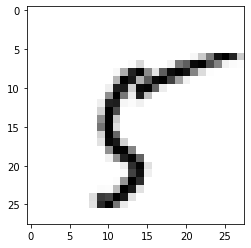

In [74]:
with t.no_grad():    
    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    x_single_data = mnist_test.data[r:r + 1].view(-1, 28 * 28).float()
    y_single_data = mnist_test.targets[r:r + 1]

    print('Label: ', y_single_data.item())
    single_prediction = model(x_single_data)
    print('Prediction: ', t.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

## 퍼셉트론
퍼셉트론: 신경세포를 본따서 다수의 입력을 받고 하나의 결과를 내는 데이터 처리 구조

>입력값 x와 가중치 w곱을 합산해 그 값을 비선형 함수로 변환시켜 출력함. 임계치를 세타로 표현 ~~

활성함수(activation function): 퍼셉트론의 입력값을 취합한 후 출력을 만들기 위해 사용되는 함수, 보통은 비선형함수가 많이 쓰임

층(layer): 퍼셉트론에서 각 데이터가 존재하는 단계. 최소한의 입력,출력 두 개의 층만 존재하면 단층 퍼셉트론 ~~

3개 이상의 층으로 이루어진 퍼셉트론을 다층 퍼셉트론( multi-layer perceptron mlp)라고함. 입력, 출력 외의 나머지 층을 은닉층(hidden layer)라고하는뎅ㅇ 은닉층이 두개 이상이면 심층신경망(deep neural network dnn)이라고함

##역전파

mlp 및 dnn의 학습은 역전파 과정을 통해 이루어짐

데이터에 대한 예측값을 계산할 때는 입력>은닉>출력층이지만 가중치 학습 때는 출력층부터 가중치가 업데이트 되므로 역전파라고 함

미분의 연쇄법칙을 통해 출력에 가까운 가중치부터 차례차례 업데이트해나감

>1. 에러를 계산하는데 쓰인 출력값에 가까운 가중치일수록 먼저 미분값을 계산하기 편하고 이전에 쓰인 가중치들은 앞서 계산한 미분값들을 바탕으로 차례차례 계산할 수 있음
2. 역전파를 완료한 후 갱신된 가중치에 대해 다시 손실값을 계산해보면 역전파 전보다 감소했음
3. 역전파 과정을 통해 가중치를 업데이트하면 1iteration의 학습이 수행됨 ^_^

## 활성 함수
sigmoid함수는 고전적으로 많이 사용해왔지만 양쪽 끝에 가면 기울기 절대값이 작아져서 경사하강법으로 학습할 떄 가중치의 변화량이 매우 적어짐

0에 가까운 미분값을 여러번 곱하면(역전파 과정에서 나중에 업데이트 되는 가중치들) 학습 효과가 거의 사라짐 : 기울기 소실

기울기 소실 문제 해결: ReLU함수

0이상의 구간에서는 선형함수와 같고 음수구간은 전부0; 직선 한군데를 꺾어서 비선형으로 만든거

수학적으로 x=0에서 미분값은 정의되지않지만 실제 구현상에선 x=0에서 미분값을 0으로 사용들한다.



In [2]:
import torch as t
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [4]:
 #MNIST문제를 MLP 사용해보자 !
 USE_CUDA=t.cuda.is_available() # GPU사용 되면 True
 device=t.device("cuda" if USE_CUDA else "cpu") #GPU안되면 CPU사용
 print('다음 기기로 학습합니다: ', device)

 random.seed(777)
 t.manual_seed(777)
 if device=='cuda':
   t.cuda.manual_seed_all(777)

다음 기기로 학습합니다:  cuda


In [5]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.model=nn.Sequential(
        nn.Linear(784,100),
        nn.ReLU(),
        nn.Linear(100,100),
        nn.ReLU(),
        nn.Linear(100,10)
    ) #sequential은 nn.Module들을 직렬로 연결한 리스트.
    #콤마로 구분해서 원하는 만큼 입력가능, forward 시 입력한 순서대로 각 모듈 실행됨
  def forward(self, x):
    return self.model(x)

In [6]:
"""
GPU 사용 시에는 텐서, nn.Module들을 GPU 메모리로 옮겨주어야 함
to(device)나 cuda()이걸로
adam은 SGD보다 발전된 형태의 경사하강법의 일종. 널리쓰이지만 간혹 과적합 문제 발생
"""
training_epochs=3
batch_size=100

mnist_train=dsets.MNIST(root='MNIST_data/',
                        train=True,
                        transform=transforms.ToTensor(),
                        download=True)
mnist_test=dsets.MNIST(root='MNIST_data/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

data_loader=DataLoader(dataset=mnist_train,
                       batch_size=batch_size,
                       shuffle=True)

model=MLP().to(device)
criterion=nn.CrossEntropyLoss().cuda()
optimizer=t.optim.Adam(model.parameters(), lr=0.01)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [7]:
for epoch in range(training_epochs):
  avg_cost=0
  total_batch=len(data_loader)

  for idx, (x_train, y_train) in enumerate(data_loader):
    x_train=x_train.view(-1,28*28).to(device)
    y_train=y_train.to(device)

    outputs=model(x_train)
    cost=criterion(outputs, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    avg_cost+=cost/total_batch

  print('Epoch: ', '%04d'% (epoch+1), 'cost= ', '{:.9f}'.format(avg_cost))
print('Learning finished~~~~~~')

Epoch:  0001 cost=  0.244314194
Epoch:  0002 cost=  0.132717043
Epoch:  0003 cost=  0.113949016
Learning finished~~~~~~


In [8]:
with t.no_grad():
  x_test=mnist_test.data.view(-1,28*28).float().to(device)
  y_test=mnist_test.targets.to(device)

  prediction=model(x_test)
  correct_prediction =t.argmax(prediction,1)==y_test
  accuracy=correct_prediction.float().mean()
  print('Accuracy: ',accuracy.item())

Accuracy:  0.9619999527931213


Label:  5
Prediction:  3


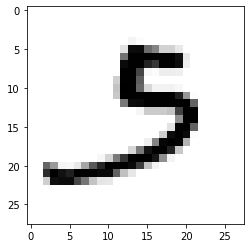

In [12]:
with t.no_grad():    
    wrong_indices=(correct_prediction==0).nonzero(as_tuple=True)[0]#틀린 샘플들 인덱스 추출
    r = random.randint(0, len(wrong_indices) - 1)
    r=wrong_indices[r].cpu().item() #gpu에 있는 텐서를 cpu메모리에 복사 근데 왜하지?
    x_single_data = mnist_test.data[r:r + 1].view(-1, 28 * 28).float().cuda()
    y_single_data = mnist_test.targets[r:r + 1].cuda()

    print('Label: ', y_single_data.item())
    single_prediction = model(x_single_data)
    print('Prediction: ', t.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

## 머신러닝 모델 평가
훈련데이터셋으로 학습 완료하면 테스트데이터셋으로 평가해요

학습을 언제 마칠 것인지 결정 혹은 학습 도중 모델의 성능을 가늠해보기 위해 검증 데이터셋을 쓰기도 함

##과적합
머신러닝 모델 학습 목적은 새로운 데이터에 대해 분류, 회귀를 잘 수행하는 것

테스트 데이터셋은 학습 도중에 활용 못하니까 검증 데이터셋을 이용해 테스트 데이터셋에서 얼마나 잘 동작할 지 가늠해보기이

조기종료 구랭